In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
import os
import xml.etree.ElementTree as et 

In [2]:
# read all files from one directory 
file_list = os.listdir('FT-data-DSpace/')
file_list

['EdixiXMLExport_20091.xml',
 'EdixiXMLExport_20101.xml',
 'EdixiXMLExport_20102.xml',
 'EdixiXMLExport_20111.xml',
 'EdixiXMLExport_20121.xml',
 'EdixiXMLExport_20131.xml',
 'EdixiXMLExport_20141.xml',
 'EdixiXMLExport_20142.xml',
 'EdixiXMLExport_20151.xml',
 'EdixiXMLExport_20161.xml']

In [3]:
for file in file_list:
    file_path = 'FT-data-DSpace/' + file
    print(file_path)

FT-data-DSpace/EdixiXMLExport_20091.xml
FT-data-DSpace/EdixiXMLExport_20101.xml
FT-data-DSpace/EdixiXMLExport_20102.xml
FT-data-DSpace/EdixiXMLExport_20111.xml
FT-data-DSpace/EdixiXMLExport_20121.xml
FT-data-DSpace/EdixiXMLExport_20131.xml
FT-data-DSpace/EdixiXMLExport_20141.xml
FT-data-DSpace/EdixiXMLExport_20142.xml
FT-data-DSpace/EdixiXMLExport_20151.xml
FT-data-DSpace/EdixiXMLExport_20161.xml


In [4]:
data = []

for file in file_list:
    xmlfile = 'FT-data-DSpace/' + file
    xtree = et.parse(xmlfile)
    xroot = xtree.getroot()
    for leaf in xroot:
        if leaf.findall('Møde'): ## if we have meetings in the leaf node
            for meeting in leaf:
                if meeting.tag == 'Møde':

                    meeting_id = meeting.find('MeetingId').text
                    meeting_date = meeting.find('DateOfSitting').text
                    meeting_number = meeting.find('Mødenummer').text
                    for agenda in meeting:
                        if agenda.tag == 'Dagsordenpunkt':
                            ### extract basic information about the meeting
                            try:
                                agenda_number = agenda.find('Punktnummer').text
                            except:
                                agenda_number = ''
                            try:
                                names = agenda.find('Mødetitel').findall('Exitus')
                                agenda_name = []
                                for name in names:
                                    agenda_name.append(name[0][0].text)
                                ## missing PreText
                            except Exception as e:
                                agenda_name = ''
                                #print(e)
                            try:
                                file_type = agenda.find('Sagstype').text
                            except:
                                file_type = ''
                            try:
                                file_number = agenda.find('Sagsnummer').text
                            except:
                                file_number = ''
                            try:
                                file_step = agenda.find('Sagstrin').text
                            except:
                                file_step = ''
                            ### extract speakers from the meeting
                            for speech in agenda.findall('Tale'):
                                try:
                                    person = speech.find('Navn').text
                                except:
                                    person = ''
                                try:
                                    role = speech.find('Rolle').text
                                except:
                                    role = ''
                                try:
                                    start = speech.find('Starttid').text
                                except:
                                    start = ''
                                try:
                                    end = speech.find('Sluttid').text
                                except:
                                    end = ''
                                try:
                                    text = speech.find('Tekst').text
                                except:
                                    text = ''
                                #print(person, role, start, end, text)
                                data.append([meeting_id, meeting_date, meeting_number, agenda_name, agenda_number,
                                          file_type, file_number, file_step, person, role, start, end, text])



df = pd.DataFrame(data,  columns=['ID', 'Date', 'MeetingNumber', 'AgendaName', 'AgendaNumber', 'FileType', 
                          'FileNumber', 'FileStep', 'SpeakerName', 'SpeakerRole', 'SpeakerStart',
                          'SpeakerEnd', 'Speech'])

###ALL DATA IS HERE
df.head(10)

,ID,Date,MeetingNumber,AgendaName,AgendaNumber,FileType,FileNumber,FileStep,SpeakerName,SpeakerRole,SpeakerStart,SpeakerEnd,Speech
0,CBAEA326-B201-41AB-A756-029BA1F58D82,2009-10-30T10:00:00,9. møde,[None],0,Formandens meddelelser,,,None,formand,2009-10-30T10:00:18.063,2009-10-30T10:01:04.997,Mødet er åbnet.I dag er der følgende anmeldels...
1,CBAEA326-B201-41AB-A756-029BA1F58D82,2009-10-30T10:00:00,9. møde,[None],0,Formandens meddelelser,,,Mogens Lykketoft,formand,2009-10-30T11:32:26.200,2009-10-30T11:33:02.087,Der er ikke mere at foretage i dette møde.Folk...
2,CBAEA326-B201-41AB-A756-029BA1F58D82,2009-10-30T10:00:00,9. møde,"[1) 1. behandling af lovforslag nr. L 43:, For...",1,Lovforslag,43,BEH1,None,formand,2009-10-30T10:01:04.997,2009-10-30T10:01:18.080,"Forhandlingen er åbnet, og den første, der får..."
3,CBAEA326-B201-41AB-A756-029BA1F58D82,2009-10-30T10:00:00,9. møde,"[1) 1. behandling af lovforslag nr. L 43:, For...",1,Lovforslag,43,BEH1,Peter Juel Jensen,medlem,2009-10-30T10:01:18.080,2009-10-30T10:02:53.290,Jeg holder ordførertalen for Venstre og på veg...
4,CBAEA326-B201-41AB-A756-029BA1F58D82,2009-10-30T10:00:00,9. møde,"[1) 1. behandling af lovforslag nr. L 43:, For...",1,Lovforslag,43,BEH1,None,formand,2009-10-30T10:02:53.290,2009-10-30T10:03:07.543,Tak til hr. Peter Juel Jensen. Der er ikke øns...
5,CBAEA326-B201-41AB-A756-029BA1F58D82,2009-10-30T10:00:00,9. møde,"[1) 1. behandling af lovforslag nr. L 43:, For...",1,Lovforslag,43,BEH1,Niels Sindal,medlem,2009-10-30T10:03:07.543,2009-10-30T10:03:26.793,Socialdemokratiet kan tilslutte sig lovforslag...
6,CBAEA326-B201-41AB-A756-029BA1F58D82,2009-10-30T10:00:00,9. møde,"[1) 1. behandling af lovforslag nr. L 43:, For...",1,Lovforslag,43,BEH1,None,formand,2009-10-30T10:03:26.793,2009-10-30T10:03:38.597,Tak til hr. Niels Sindal. Så er det hr. Henrik...
7,CBAEA326-B201-41AB-A756-029BA1F58D82,2009-10-30T10:00:00,9. møde,"[1) 1. behandling af lovforslag nr. L 43:, For...",1,Lovforslag,43,BEH1,Henrik Brodersen,medlem,2009-10-30T10:03:38.597,2009-10-30T10:04:24.267,"Jeg skal på Dansk Folkepartis vegne sige, at v..."
8,CBAEA326-B201-41AB-A756-029BA1F58D82,2009-10-30T10:00:00,9. møde,"[1) 1. behandling af lovforslag nr. L 43:, For...",1,Lovforslag,43,BEH1,None,formand,2009-10-30T10:04:24.267,2009-10-30T10:04:36.837,Tak. Var det en venlig hilsen fra hr. Niels He...
9,CBAEA326-B201-41AB-A756-029BA1F58D82,2009-10-30T10:00:00,9. møde,"[1) 1. behandling af lovforslag nr. L 43:, For...",1,Lovforslag,43,BEH1,Høgni Hoydal,medlem,2009-10-30T10:04:36.837,2009-10-30T10:05:13.277,Jeg vil stille et spørgsmål til ordføreren for...


In [5]:
df.shape

(380883, 13)

In [6]:
# find the content of the tag you wish 
# for i in xtree.findall('.//Tekst'):
#     print(i.text) 

# Task 1: how long does a person speaks?

In [7]:
# convert SpeakerStart and SpeakerEnd to datetime format
df['Start'] = pd.to_datetime(df['SpeakerStart'])
df['End'] = pd.to_datetime(df['SpeakerEnd'])
df['DurationMinutes'] = df['End'] - df['Start']
df['DurationMinutes']

0        00:00:46.934000
1        00:00:35.887000
2        00:00:13.083000
3        00:01:35.210000
4        00:00:14.253000
               ...      
380878   00:00:32.920000
380879   00:00:04.144000
380880   00:00:06.540000
380881   00:00:02.776000
380882   00:00:16.184000
Name: DurationMinutes, Length: 380883, dtype: timedelta64[ns]

In [8]:
df['DurationMinutes'] = round(df['DurationMinutes']/np.timedelta64(1,'m'), 1)
df['DurationMinutes']

0         0.8
1         0.6
2         0.2
3         1.6
4         0.2
         ... 
380878    0.5
380879    0.1
380880    0.1
380881    0.0
380882    0.3
Name: DurationMinutes, Length: 380883, dtype: float64

In [9]:
duration = df.groupby('DurationMinutes').DurationMinutes.count()
duration = duration.sort_values(ascending = True)
duration 

DurationMinutes
7200.3         1
8.8            1
9.2            1
10.1           1
60.2           1
           ...  
0.3        17601
0.7        17614
0.2        23502
0.1        52638
0.0       106958
Name: DurationMinutes, Length: 101, dtype: int64

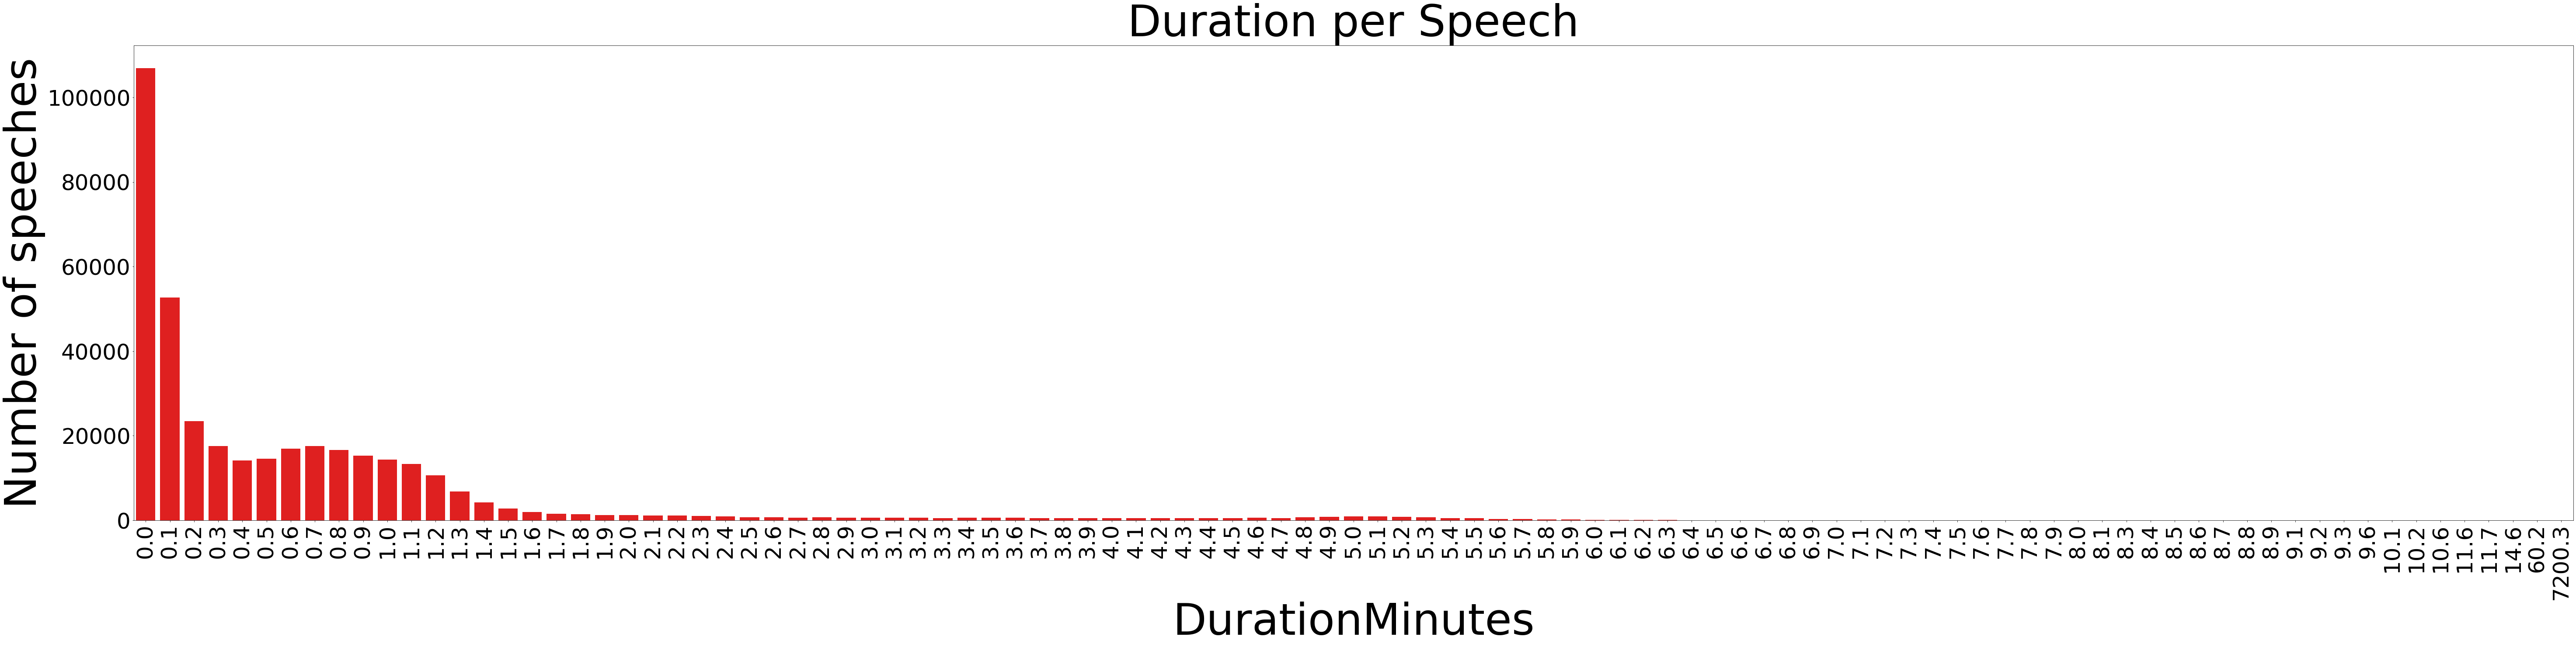

In [10]:
plt.figure(figsize = (100, 20))
plt.title('Duration per Speech', fontsize = 100)
plt.xlabel('Duration', fontsize = 100)
plt.ylabel('Number of speeches', fontsize = 100)
plt.xticks(rotation = 90, fontsize = 50)
plt.yticks(fontsize = 50)
sns.barplot(x = duration.index, y = duration.values, color = 'red')
plt.show()

# Task 2: how many times each speaker spoke?

In [11]:
speakercnt = df.groupby('SpeakerName').SpeakerName.count()
speakercnt = speakercnt.sort_values(ascending = False)
speakercnt 

SpeakerName
Bertel Haarder          14313
Holger K. Nielsen       13163
Søren Espersen          10636
Bent Bøgsted             9904
Christian Juhl           9857
                        ...  
KF                          1
Bente Kronborg Holst        1
Thor Pedersen               1
Jens Arne Hedegaard         1
Peder Christensen           1
Name: SpeakerName, Length: 390, dtype: int64

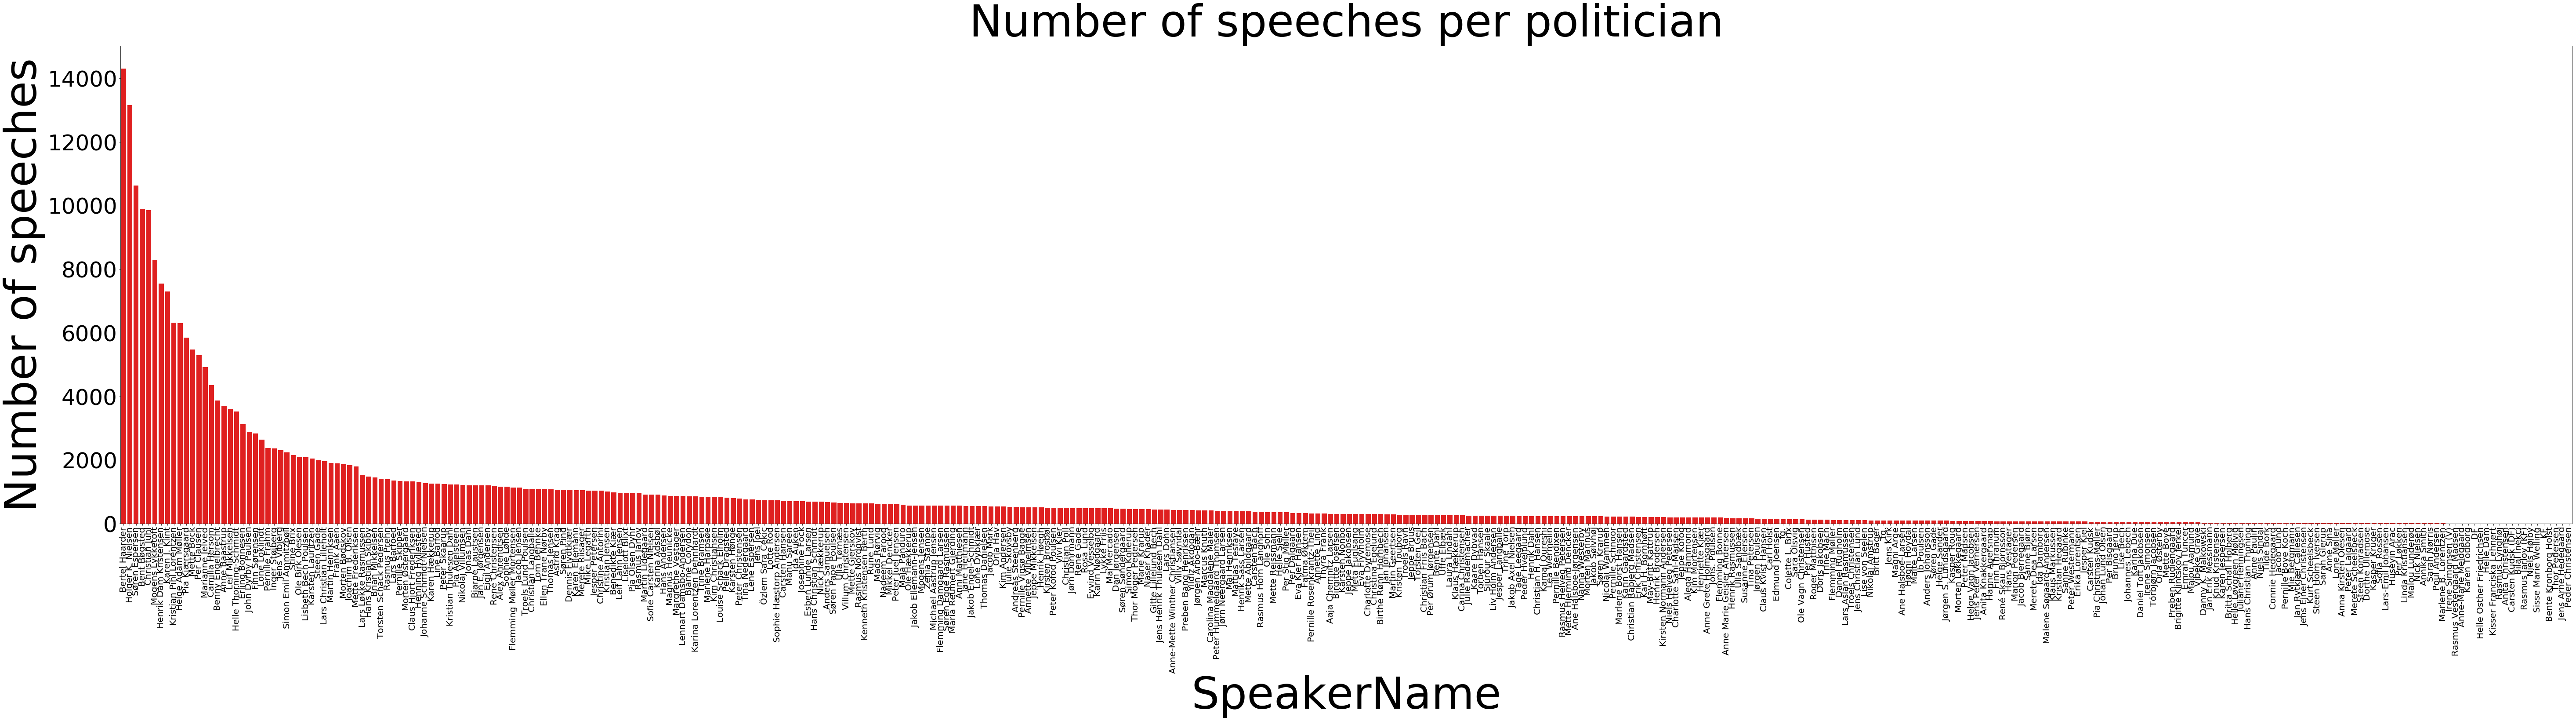

In [12]:
plt.figure(figsize = (100, 20))
plt.title('Number of speeches per politician', fontsize = 100)
plt.xlabel('Politician', fontsize = 100)
plt.ylabel('Number of speeches', fontsize = 100)
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 50)
sns.barplot(x = speakercnt.index, y = speakercnt.values, color = 'red')
plt.show()

In [13]:
# find the 50 most frequent
mostfreq = speakercnt.head(50)
mostfreq

SpeakerName
Bertel Haarder              14313
Holger K. Nielsen           13163
Søren Espersen              10636
Bent Bøgsted                 9904
Christian Juhl               9857
Mogens Lykketoft             8298
Henrik Dam Kristensen        7551
Karen J. Klint               7306
Kristian Pihl Lorentzen      6317
Helge Adam Møller            6308
Pia Kjærsgaard               5852
Mette Bock                   5468
Per Clausen                  5289
Marianne Jelved              4927
Camilla Hersom               4352
Benny Engelbrecht            3870
Anne Baastrup                3700
Leif Mikkelsen               3612
Helle Thorning-Schmidt       3521
Erling Bonnesen              3130
John Dyrby Paulsen           2889
Finn Sørensen                2832
Lone Loklindt                2646
Pernille Frahm               2385
Inger Støjberg               2358
Jens Vibjerg                 2308
Simon Emil Ammitzbøll        2239
Stine Brix                   2158
Ole Birk Olesen              2108
Li

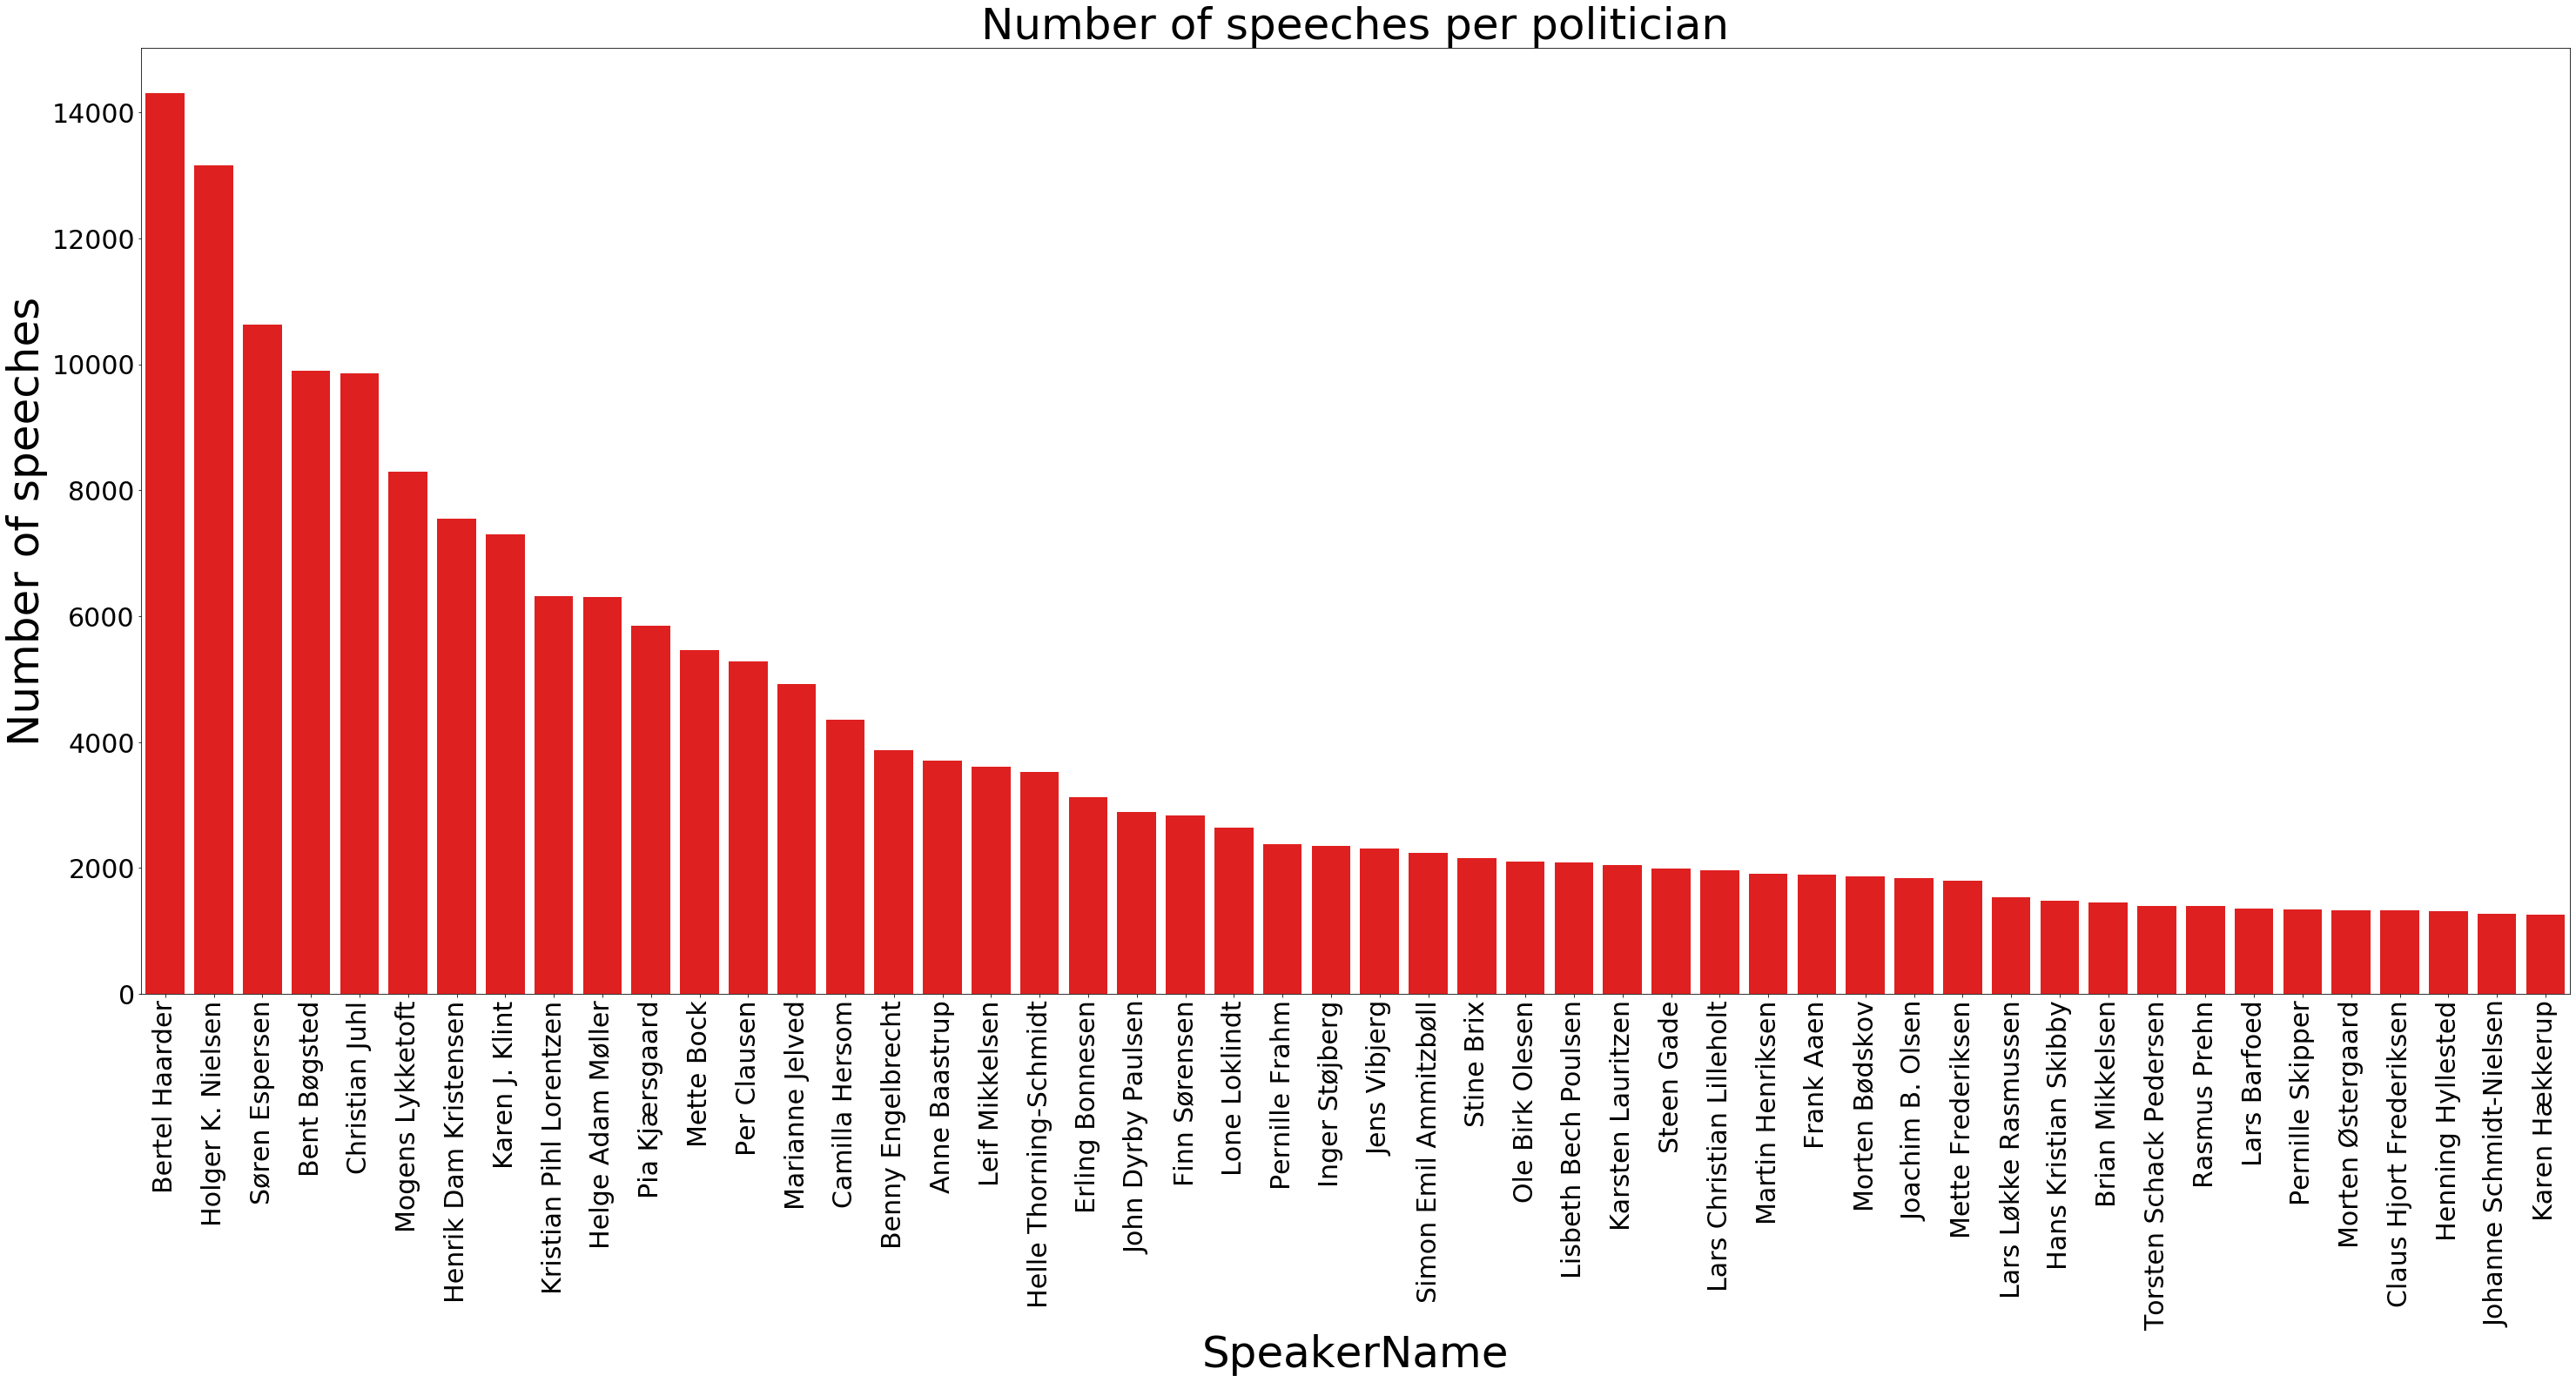

In [14]:
plt.figure(figsize = (50, 20))
plt.title('Number of speeches per politician', fontsize = 50)
plt.xlabel('Politician', fontsize = 50)
plt.ylabel('Number of speeches', fontsize = 50)
plt.xticks(rotation = 90, fontsize = 30)
plt.yticks(fontsize = 30)
sns.barplot(x = mostfreq.index, y = mostfreq.values, color = 'red')
plt.show()

# Task 3: look whether 'medler' talks more often than 'fordmand'.

In [15]:
rolecnt = df.groupby('SpeakerRole').SpeakerRole.count()
rolecnt = rolecnt.sort_values(ascending = False)
rolecnt

SpeakerRole
formand                196870
medlem                 149794
minister                33942
fungerende minister       246
aldersformanden            18
midlertidig formand        13
Name: SpeakerRole, dtype: int64

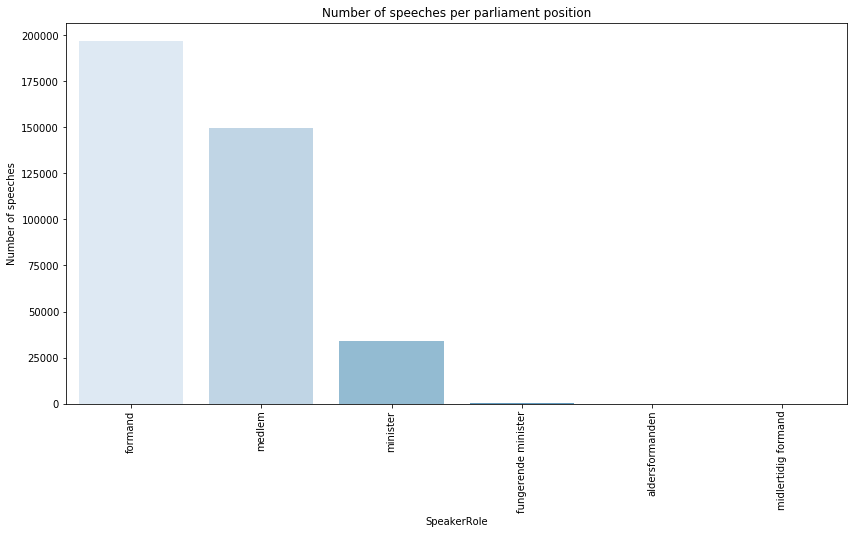

In [16]:
plt.figure(figsize = (14, 7))
plt.title('Number of speeches per parliament position')
plt.xlabel('Parliament position')
plt.ylabel('Number of speeches')
plt.xticks(rotation = 90)
sns.barplot(x = rolecnt.index, y = rolecnt.values, palette = 'Blues')
plt.show()